In [1]:
from pyspark.sql.functions import col, avg
import pandas as pd
from matplotlib import pyplot as plt

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[1]").appName('Eda').getOrCreate()
df = spark.read.csv("preprocessed_datasets/clean_data.csv", sep = ',', header=True)

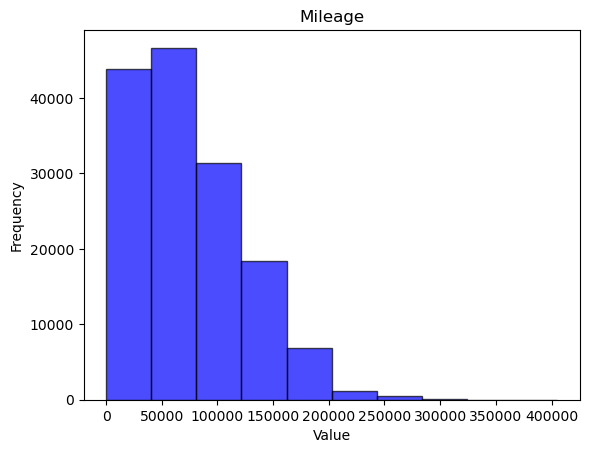

In [2]:
df_pandas = df.select("milage").toPandas()
df_pandas["milage"] = pd.to_numeric(df_pandas["milage"])  # Convert to integer or float

# Plot the histogram
plt.hist(df_pandas["milage"], color='blue', edgecolor='black', alpha=0.7)
plt.title('Mileage')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

+-----------+---------+
|      brand|avg_price|
+-----------+---------+
|Lamborghini|   129229|
|    Ferrari|   108084|
|    McLaren|   107067|
|Rolls-Royce|   106456|
|    Bentley|    96694|
|      Aston|    84083|
|    Porsche|    61624|
|   Maserati|    53587|
|    Genesis|    51847|
|       Alfa|    49813|
+-----------+---------+



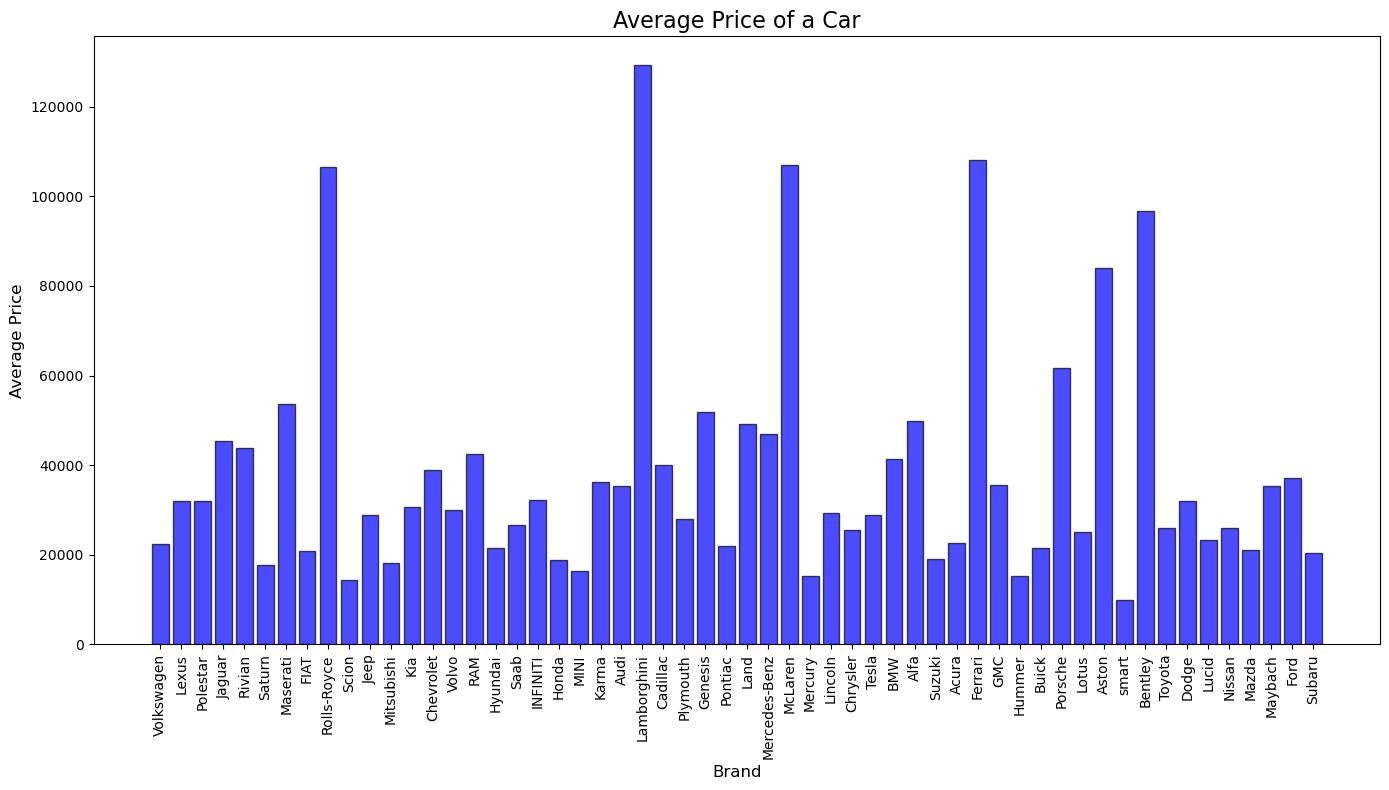

In [3]:
df_brand_price = df.select("brand", "price")

df_avg_price = df_brand_price.groupBy("brand").agg(avg("price").cast("int").alias("avg_price"))
top10_highest_avg_price = (df_avg_price.orderBy(col("avg_price").desc())).limit(10)
top10_highest_avg_price.show()
#print(f"Brand with the highest average price: {highest_avg_price['brand']} (${highest_avg_price['avg_price']:.2f})")

# Convert the PySpark DataFrame to Pandas for plotting
df_pandas = df_avg_price.select("brand", "avg_price").toPandas()
df_pandas["avg_price"] = pd.to_numeric(df_pandas["avg_price"])  # Convert to numeric

# Plot the bar chart
plt.figure(figsize=(14, 8))  # Adjust the figure size for better readability
plt.bar(df_pandas["brand"], df_pandas["avg_price"], color='blue', edgecolor='black', alpha=0.7)

# Customize the chart
plt.title('Average Price of a Car', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate brand names vertically

# Display the chart
plt.tight_layout()  # Automatically adjust layout to avoid clipping
plt.show()